<a href="https://colab.research.google.com/github/saumya0303/Neural_Network_Creation/blob/master/Tensorflow_regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [0]:
#create our own dataset
x_data=np.linspace(0.0,10,100000)
noise=np.random.randn(len(x_data))

In [0]:
y_true=0.5*x_data+5 +noise
#to make little harder for model add some noise

In [0]:
#just to better visualize
x_df=pd.DataFrame(data=x_data,columns=['X DATA'])
y_df=pd.DataFrame(data=y_true,columns=['Y'])
print(y_df)
my_data=pd.concat([x_df,y_df],axis=1)
print(my_data.head())

               Y
0       4.403570
1       5.346113
2       5.830474
3       4.296205
4       3.983581
...          ...
99995   8.788689
99996   9.236706
99997   9.573682
99998  10.925560
99999  10.229283

[100000 rows x 1 columns]
   X DATA         Y
0  0.0000  4.403570
1  0.0001  5.346113
2  0.0002  5.830474
3  0.0003  4.296205
4  0.0004  3.983581


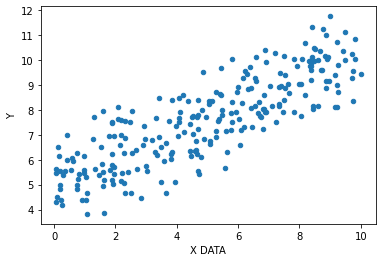

In [0]:
my_data.sample(250).plot(kind='scatter',x='X DATA',y='Y')

In [0]:
#million points are large number of points to pass in we cannot feed million point at once so better create batches
batch_size=8 #take 8 points at a time

In [0]:
m=tf.Variable(0.81)
b=tf.Variable(0.17)

In [0]:
xph=tf.placeholder(tf.float32,[batch_size])
yph=tf.placeholder(tf.float32,[batch_size])

In [0]:
y_model=m*xph+b

In [0]:
error=tf.reduce_sum(tf.square(yph-y_model))

In [0]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(error)

In [0]:
init=tf.compat.v1.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init)
  batches=1000
  for i in range(batches):
    rand_ind=np.random.randint(len(x_data),size=batch_size)
    feed={xph:x_data[rand_ind],yph:y_true[rand_ind]}
    sess.run(train,feed_dict=feed)
  model_m,model_b=sess.run([m,b])

In [39]:
print(model_m)
y_hat=x_data*model_m+model_b

0.52736586


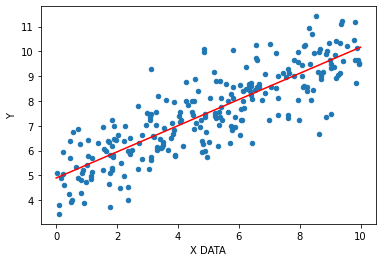

In [40]:
my_data.sample(250).plot(kind='scatter',x='X DATA',y='Y')
plt.plot(x_data,y_hat,'r')